#Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,roc_curve,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Data Overview

In [ ]:
data = pd.read_csv("/content/Fraud.csv")

In [ ]:
x = data.info
x

<bound method DataFrame.info of         step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
124452    11  TRANSFER  1428231.23   C672404201        5689.00   
124453    11   PAYMENT    24444.57    C50554983       95761.29   
124454    11   PAYMENT     9495.13   C516667550       71316.72   
124455    11   PAYMENT     6644.65   C244871179        3025.00   
124456    11   CASH_IN    82501.87          NaN            NaN   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155             0.0            0.00      0.0   
1             19384.72  M2044282225             0.0            0.00      0.0   
2                 0.00   C553264065             0.0            0.00      1.0   
3                 0.00    C38997010         21182.0            0.00      1.0   
4             29885.86  M1230701703             0.0            0.00      0.0   
...                ...          ...             ...             ...      ...   
124452            0.00   C120609687          9660.0      1437891.23      0.0   
124453        71316.72  M1302072491             0.0            0.00      0.0   
124454        61821.60   M373322484             0.0            0.00      0.0   
124455            0.00   M600628263             0.0            0.00      0.0   
124456             NaN          NaN             NaN             NaN      NaN   

        isFlaggedFraud  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
124452             0.0  
124453             0.0  
124454             0.0  
124455             0.0  
124456             NaN  

[124457 rows x 11 columns]>

In [ ]:
data.shape

(124457, 11)

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,124457.000000,1.244570e+05,1.244560e+05,1.244560e+05,1.244560e+05,1.244560e+05,124456.000000,124456.0
mean,8.920945,1.773613e+05,9.047501e+05,9.209941e+05,9.004621e+05,1.185246e+06,0.000964,0.0
std,1.857028,3.440304e+05,2.850751e+06,2.887776e+06,2.391423e+06,2.749984e+06,0.031037,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.059726e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.785259e+04,2.009300e+04,0.000000e+00,2.830632e+04,7.527365e+04,0.000000,0.0
75%,10.000000,2.180569e+05,1.952794e+05,2.222311e+05,6.424462e+05,1.097218e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


contains null values hence dropping them

In [ ]:
duplicate = data.duplicated().sum()
duplicate

0

In [ ]:
df = data.dropna()
print(df)

        step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
124451    11   PAYMENT    34492.01   C624782729       81015.00   
124452    11  TRANSFER  1428231.23   C672404201        5689.00   
124453    11   PAYMENT    24444.57    C50554983       95761.29   
124454    11   PAYMENT     9495.13   C516667550       71316.72   
124455    11   PAYMENT     6644.65   C244871179        3025.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155             0.0            0.00      0.0   
1             19384.72  M2044282225            

In [ ]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


working for outliers

In [68]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include= 'object').columns.tolist()


In [69]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")

Outliers removed from step
Outliers removed from amount
Outliers removed from oldbalanceOrg
Outliers removed from newbalanceOrig
Outliers removed from oldbalanceDest
Outliers removed from newbalanceDest
Outliers removed from isFraud
Outliers removed from isFlaggedFraud



#EDA




In [ ]:
target_values = df['isFraud'].value_counts()
target_values

,count
isFraud,
0.0,124336
1.0,120


column filters

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include= 'object').columns.tolist()

In [ ]:
variance =  df[num_cols].var()
variance
skew =  df[num_cols].skew()
skew

,0
step,-2.288015
amount,5.292330
oldbalanceOrg,5.315612
newbalanceOrig,5.244558
oldbalanceDest,5.038314
newbalanceDest,4.358366
isFraud,32.158346
isFlaggedFraud,0.000000


bsic information about the data

In [ ]:
notFraud = len(df[df['isFraud'] == 0])
fraud = len(df[df['isFraud'] == 1])
flagFraud = len(df[df['isFlaggedFraud'] == 1])

notFraud_percent = (notFraud / (fraud + notFraud)) * 100
fraud_percent = (fraud / (fraud + notFraud)) * 100

print("Number of Legitimate transactions: ", notFraud)
print("Number of Fraud transactions: ", fraud)
print("Number of Fraud transactions flagged: ", flagFraud)
print("Percentage of Legit transactions: {:.4f} %".format(notFraud_percent))
print("Percentage of Fraud transactions: {:.3f} %".format(fraud_percent))

Number of Legitimate transactions:  124336
Number of Fraud transactions:  120
Number of Fraud transactions flagged:  0
Percentage of Legit transactions: 99.9036 %
Percentage of Fraud transactions: 0.096 %


<Axes: xlabel='type', ylabel='count'>

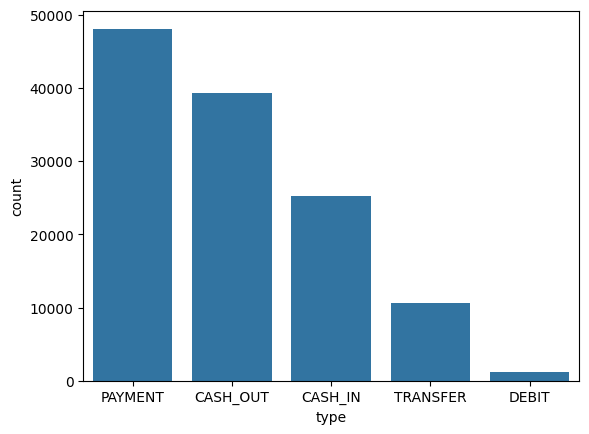

In [ ]:
sns.countplot(x='type',data=df,order=df['type'].value_counts().index)

We can see that the target column is highly imbalanced. For handling the imabalanced dataset we need to use the SMOTE technique.



min - max scaling

In [29]:
scaler = MinMaxScaler()

label encodeing

In [31]:
encode = preprocessing.LabelEncoder()   #making an obj of LabelEncoder()
df['isFraud'] = encode.fit_transform(df['isFraud'])  #applying LabelEncoding through fit_transform

In [32]:
x  = df.drop('isFraud', axis='columns')  #features columns
y = df['isFraud']

column transformation

In [34]:
transformer1 = ColumnTransformer(transformers=[
    ('trs1',OneHotEncoder(),['type','amount','isFlaggedFraud'])
],remainder='passthrough')
transformer1

ColumnTransformer(remainder='passthrough',
                  transformers=[('trs1', OneHotEncoder(),
                                 ['type', 'amount', 'isFlaggedFraud'])])

In [36]:
transformer1 = ColumnTransformer(transformers=[
    ('trs1',OneHotEncoder(),['type','isFlaggedFraud']) # Removed 'amount' from the columns list
],remainder='passthrough')
x = transformer1.fit_transform(x)

In [37]:
y.value_counts()

,count
isFraud,
0,124336
1,120


#APPLYING SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()


for i in range(x.shape[1]):

    if isinstance(x[0, i], str):

        x[:, i] = le.fit_transform(x[:, i])

# Apply SMOTE to the transformed dataset
smt = SMOTE(sampling_strategy='minority')
x_smt, y_smt = smt.fit_resample(x, y)

y_smt.value_counts()

,count
isFraud,
0,124336
1,124336


DATA IS NOW BALANCED

In [40]:
x_smt.shape

(248672, 14)

In [41]:
y_smt.shape

(248672,)

# Hyper Parameter Tuning


#TRAIN TEST SPLIT

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.20, random_state=0)

#LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

PREDICTION AND ACCURACY

In [60]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y_pred = lr_model.predict(x_test)
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Testing Accuracy: 88.73%


CONFUSION MATRIX

In [46]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24899
           1       0.91      0.86      0.88     24836

    accuracy                           0.89     49735
   macro avg       0.89      0.89      0.89     49735
weighted avg       0.89      0.89      0.89     49735



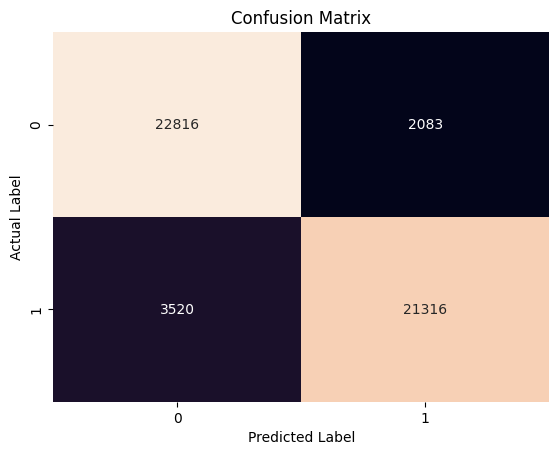

True Negeatives : 22816
False Positives : 2083
False Negeatives : 3520
True Positives : 21316


In [48]:
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print(f'True Negeatives : {confusion_matrix(y_test,y_pred)[0][0]}')
print(f'False Positives : {confusion_matrix(y_test,y_pred)[0][1]}')
print(f'False Negeatives : {confusion_matrix(y_test,y_pred)[1][0]}')
print(f'True Positives : {confusion_matrix(y_test,y_pred)[1][1]}')

#RANDOM FOREST CLASSIFIER

In [49]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Testing Accuracy: 88.73%


In [52]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[22816,  2083],
       [ 3520, 21316]])

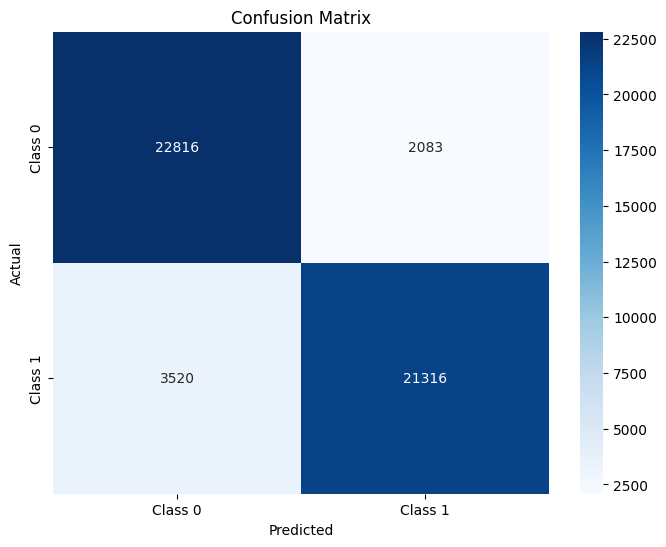

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#XG - BOOST

In [58]:
# Train the XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [59]:
# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Testing Accuracy: 88.73%



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24899
           1       0.91      0.86      0.88     24836

    accuracy                           0.89     49735
   macro avg       0.89      0.89      0.89     49735
weighted avg       0.89      0.89      0.89     49735



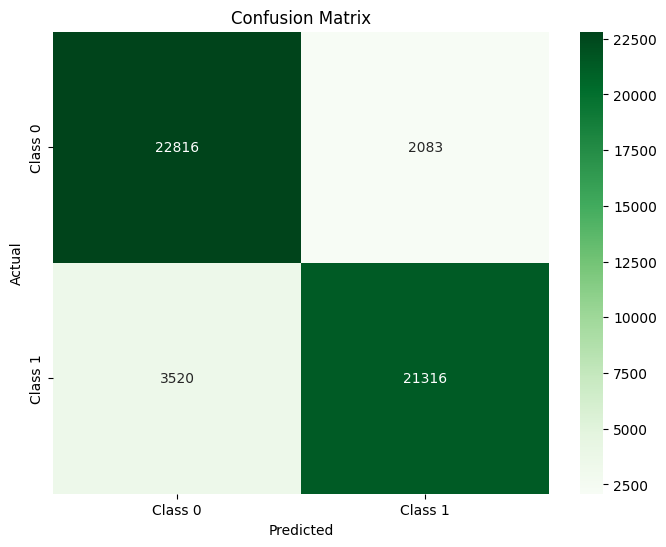

In [64]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyper Parameter Tunning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.20, random_state=0)

# Initialize the model
model = RandomForestClassifier(random_state=0)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits


#QUESTIONS AND ANSWERS

#Q1. Data Cleaning including missing values, outliers and multi - collinearity

Ans - A lot of outliers were found and removed in the above code.  Using 2 Approaches which are Drop and Scalinig
There were very few missing values found in the above code which were dropped

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

#Q2. Describe your model in ellobaration
The notebook begins with basic **overview of data** and **EDA**.
During exploration i have found the data imbalance, **missing values** and **outliers** which have been taken care of.
After the basic exploration, cleaning and handling data by applying **SMOTE, Droppping and Scaling**, I  have tried the traing of **Logistic Regression, Random Forest Classifier and XG - Boost** which were giving **88.73 % Accuracy**. Furthermore, i have printed the **confusion matrix** for more detailed reports.

# Q3. How did you select variables to be included in the model ?
I have done the overview of csv data file where I found few columns which were not giving required information while building the  models and hence I dropped them.
I have considered four columns namely - type, amount, isFraud,isFlaggedFraud

# Q4. Demonstrate the performance of the model by using best of tools
I have plotted the accuracy heat map and condusion matrix with detailed model performance report.


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24899
           1       0.91      0.86      0.88     24836

    accuracy                           0.89     49735
   macro avg       0.89      0.89      0.89     49735
weighted avg       0.89      0.89      0.89     49735



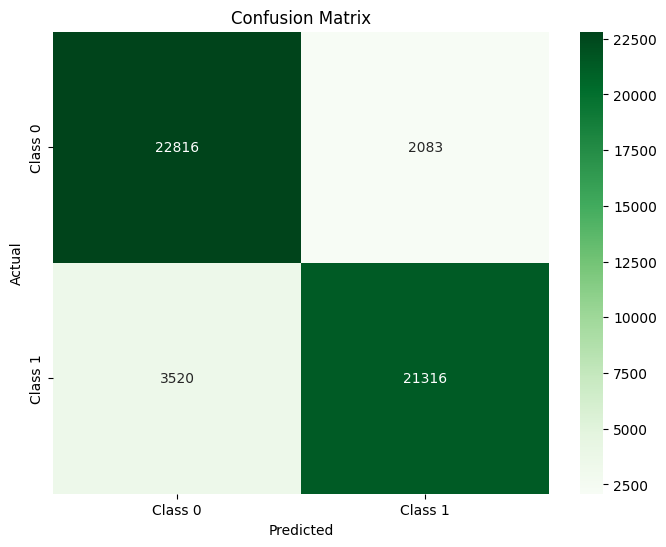

array([[22816,  2083],
       [ 3520, 21316]])

In [72]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


#Q5. What are the key factors that predict fraudelent customer?
I took four columns namely type, amount, isFraud,isFlaggedFraud which are acting as the key factors to predict the fraudelent customers.

# Q6. Do these factors make sense? If yes, How ? If no, How ?
Yes, Because these key factors hold the actual and sufficient information for any fraudulent transaction and describing the best of the scenario.  

# Q7. What kind of prevention should be adopted while company update its infrastructure ?

Real-time Monitoring: Implement real-time transaction monitoring systems that utilize machine learning algorithms to detect unusual patterns indicative of fraud.
Anomaly Detection: Develop and deploy models specifically designed to identify outliers in transaction data.

Continuous Monitoring and Logging
Centralized Logging: Implement centralized logging of all transaction-related activities for auditing and analysis.
Regular Audits: Schedule regular audits to review transaction logs and identify patterns that may indicate fraud.

Comprehensive Risk Assessment
Vulnerability Analysis: Conduct thorough assessments to identify potential vulnerabilities in the new infrastructure that could be exploited by fraudsters.
Threat Modeling: Identify specific threats related to financial fraud, such as transaction manipulation, account takeover, and data breaches.

Enhanced Data Security
Encryption: Implement strong encryption protocols for sensitive financial data both in transit and at rest to protect against unauthorized access.
Data Masking: Use data masking techniques for sensitive information, especially in non-production environments.

# Q8. Assuming these actions have been implemented, how would you determine if they work ?




1.Define Key Performance Indicators (KPIs)
Fraud Detection Rate: Measure the percentage of actual fraud cases detected by the system compared to total fraud cases.
False Positive Rate: Calculate the percentage of legitimate transactions incorrectly flagged as fraudulent. A high false positive rate can lead to customer dissatisfaction and wasted resources.
Time to Detection: Measure the average time taken to detect fraudulent transactions after they occur. Quicker detection is often indicative of an effective monitoring system.
Incident Response Time: Evaluate how quickly the team can respond to flagged transactions and take appropriate actions.

2.Model Accuracy: Evaluate the accuracy of the anomaly detection models by using metrics such as precision, recall, F1-score, and ROC-AUC.
Validation on Historical Data: Test the models on historical transaction data with known fraud cases to assess their ability to detect past fraudulent activities.

Post-Incident Reviews: Analyze cases of fraud that slip through the detection system to understand why they were not caught and adjust models accordingly.

3.User Feedback and Incident Reports
Gather User Feedback: Collect feedback from users about the transaction monitoring process, focusing on their experience..
Incident Reports: Review reports from the security team on incidents that were detected or not detected, analyzing the effectiveness of the response protocols.